In [1]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import heartpy as hp

from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

In [2]:
%load_ext autoreload
%autoreload 1
%aimport qex

In [48]:
%reload_ext autoreload

In [3]:
# location of the files when in one of the local project files
projectName = '230214_Equivital' # this needs to match the project folder name
path = "D:\\"+projectName+"\\"#Extracted SEM Data\\" #"../Equivital/Equivital Manager Wizard/Extracted SEM Data/"
#os.listdir(path)
# sep = '/'
sep = '\\'

In [12]:
# location of the files when in one of the local project files
projectName = '230215_Rehearsal' # this needs to match the project folder name
path = "/Volumes/fourMs_Eq1/Equivital/"+projectName+"/"#Extracted SEM Data\\" #"../Equivital/Equivital Manager Wizard/Extracted SEM Data/"
sep = '/'
os.listdir(path)


['230215_Equivital_Rehearsal_Qiosk_recordings.csv',
 '230215_Rehearsal_Qiosk_recordings.csv',
 'CSV',
 'SEM']

In [124]:
df_datafiles = qex.qiosk_rec_check(path,projectName,sep)
df_datafiles

,Signal,DevName,ID,Date,Session,FileName,FileType,FileSize,RecStart,RecEnd,...,SubjectNames,SENSOR ID,SUBJECT ID,SUBJECT AGE,HR(BPM),HRC(%),BELT OFF,LEAD OFF,MOTION,BODY POSITION
0,DATA,VN205,5022060,230216,0,DATA-VN205-5022060-23021600-cut.csv,csv,64201,2023-02-16 08:15:01+00:00,2023-02-16 11:29:46+00:00,...,[VN205],5022060.0,VN205,NaN,66.0,98.0,0.0,0.0,Stationary,Upright
1,DATA,WW506,5022166,230216,0,DATA-WW506-5022166-23021600-cut.csv,csv,64376,2023-02-16 08:15:02+00:00,2023-02-16 11:29:47+00:00,...,[WW506],5022166.0,WW506,NaN,82.0,98.0,0.0,0.0,Stationary,Upright
2,DATA,WW501,5022155,230216,0,DATA-WW501-5022155-23021600-cut.csv,csv,64416,2023-02-16 08:15:02+00:00,2023-02-16 11:29:47+00:00,...,[WW501],5022155.0,WW501,NaN,79.0,98.0,0.0,0.0,Stationary,Upright
3,DATA,VA301,5022100,230216,0,DATA-VA301-5022100-23021600-cut.csv,csv,64353,2023-02-16 08:15:02+00:00,2023-02-16 11:29:47+00:00,...,[VA301],5022100.0,VA301,NaN,83.0,98.0,0.0,0.0,Stationary,Upright
4,DATA,VN208,5022076,230216,0,DATA-VN208-5022076-23021600-cut.csv,csv,64213,2023-02-16 08:15:03+00:00,2023-02-16 11:29:48+00:00,...,[VN208],5022076.0,VN208,NaN,79.0,98.0,0.0,0.0,Stationary,Upright
5,DATA,PC701,5022238,230216,0,DATA-PC701-5022238-23021600-cut.csv,csv,64652,2023-02-16 08:15:03+00:00,2023-02-16 11:29:48+00:00,...,[PC701],5022238.0,PC701,NaN,78.0,48.0,0.0,0.0,Stationary,Upright
6,DATA,VN209,5022077,230216,0,DATA-VN209-5022077-23021600-cut.csv,csv,64085,2023-02-16 08:15:03+00:00,2023-02-16 11:29:48+00:00,...,[VN209],5022077.0,VN209,NaN,71.0,98.0,0.0,0.0,Stationary,Upright
7,DATA,LS403,5022141,230216,0,DATA-LS403-5022141-23021600-cut.csv,csv,64358,2023-02-16 08:15:03+00:00,2023-02-16 11:29:48+00:00,...,[LS403],5022141.0,LS403,NaN,94.0,98.0,0.0,0.0,Stationary,Upright
8,DATA,VN210,5022098,230216,0,DATA-VN210-5022098-23021600-cut.csv,csv,64252,2023-02-16 08:15:03+00:00,2023-02-16 11:29:48+00:00,...,[VN210],5022098.0,VN210,NaN,74.0,99.0,0.0,0.0,Stationary,Upright
9,DATA,BR605,5022202,230216,0,DATA-BR605-5022202-23021600-cut.csv,csv,64151,2023-02-16 08:15:04+00:00,2023-02-16 11:29:49+00:00,...,[BR605],5022202.0,BR605,NaN,74.0,95.0,0.0,0.0,Stationary,Upright


# Define subsection to check and trim

In [14]:
s_files=df_datafiles

In [105]:
projectPath = '/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/Dress/'
t1 = pd.to_datetime('2023-02-15 12:04:00.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
t2 = pd.to_datetime('2023-02-15 12:08:00.00+0100')
ta = pd.to_datetime('2023-02-15 12:05:00.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
tb = pd.to_datetime('2023-02-15 12:06:30.00+0100')
#t2 = t1+pd.to_timedelta(240,'s')
[t1,t2]

[Timestamp('2023-02-15 12:04:00+0100', tz='pytz.FixedOffset(60)'),
 Timestamp('2023-02-15 12:08:00+0100', tz='pytz.FixedOffset(60)')]

In [155]:
# location of the files when in one of the local project files
projectName = '230216_Lydo_Concerts' # this needs to match the project folder name
path = "/Volumes/fourMs_Eq1/Equivital/"+projectName+"/"#Extracted SEM Data\\" #"../Equivital/Equivital Manager Wizard/Extracted SEM Data/"
sep = '/'
s_files = qex.qiosk_rec_check(path,projectName,sep)
print(len(s_files))

projectPath = '/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C1/'
t1 = pd.to_datetime('2023-02-16 9:31:30.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
t2 = pd.to_datetime('2023-02-16 9:35:30.00+0100')
ta = pd.to_datetime('2023-02-16 9:30:00.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
tb = pd.to_datetime('2023-02-16 9:35:30.00+0100')
#t2 = t1+pd.to_timedelta(240,'s')
[t1,t2]

55


[Timestamp('2023-02-17 09:31:30+0100', tz='pytz.FixedOffset(60)'),
 Timestamp('2023-02-17 09:35:30+0100', tz='pytz.FixedOffset(60)')]

In [150]:
# location of the files when in one of the local project files
projectName = '230216_Lydo_Concerts' # this needs to match the project folder name
path = "/Volumes/fourMs_Eq1/Equivital/"+projectName+"/"#Extracted SEM Data\\" #"../Equivital/Equivital Manager Wizard/Extracted SEM Data/"
sep = '/'
s_files = qex.qiosk_rec_check(path,projectName,sep)
print(len(s_files))

projectPath = '/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C2/'
t1 = pd.to_datetime('2023-02-16 11:14:30.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
t2 = pd.to_datetime('2023-02-16 11:18:30.00+0100')
ta = pd.to_datetime('2023-02-16 11:16:00.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
tb = pd.to_datetime('2023-02-16 11:17:30.00+0100')
#t2 = t1+pd.to_timedelta(240,'s')
[t1,t2]

55


[Timestamp('2023-02-16 11:14:30+0100', tz='pytz.FixedOffset(60)'),
 Timestamp('2023-02-16 11:18:30+0100', tz='pytz.FixedOffset(60)')]

In [161]:
# location of the files when in one of the local project files
projectName = '230217_Lydo_Concerts' # this needs to match the project folder name
path = "/Volumes/fourMs_Eq1/Equivital/"+projectName+"/"#Extracted SEM Data\\" #"../Equivital/Equivital Manager Wizard/Extracted SEM Data/"
sep = '/'
s_files = qex.qiosk_rec_check(path,projectName,sep)
print(len(s_files))

projectPath = '/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C3/'
t1 = pd.to_datetime('2023-02-17 9:29:00.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
t2 = pd.to_datetime('2023-02-17 9:33:00.00+0100')
ta = pd.to_datetime('2023-02-17 9:30:00.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
tb = pd.to_datetime('2023-02-17 9:32:30.00+0100')
#t2 = t1+pd.to_timedelta(240,'s')
[t1,t2]

55


[Timestamp('2023-02-17 09:29:00+0100', tz='pytz.FixedOffset(60)'),
 Timestamp('2023-02-17 09:33:00+0100', tz='pytz.FixedOffset(60)')]

In [164]:
# location of the files when in one of the local project files
projectName = '230217_Lydo_Concerts' # this needs to match the project folder name
path = "/Volumes/fourMs_Eq1/Equivital/"+projectName+"/"#Extracted SEM Data\\" #"../Equivital/Equivital Manager Wizard/Extracted SEM Data/"
sep = '/'
s_files = qex.qiosk_rec_check(path,projectName,sep)
print(len(s_files))

projectPath = '/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C4/'
t1 = pd.to_datetime('2023-02-17 11:14:30.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
t2 = pd.to_datetime('2023-02-17 11:18:30.00+0100')
ta = pd.to_datetime('2023-02-17 11:16:00.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
tb = pd.to_datetime('2023-02-17 11:17:30.00+0100')
#t2 = t1+pd.to_timedelta(240,'s')
[t1,t2]

55


[Timestamp('2023-02-17 11:14:30+0100', tz='pytz.FixedOffset(60)'),
 Timestamp('2023-02-17 11:18:30+0100', tz='pytz.FixedOffset(60)')]

In [173]:
# location of the files when in one of the local project files
projectName = '230218_Lydo_Concerts' # this needs to match the project folder name
path = "/Volumes/fourMs_Eq1/Equivital/"+projectName+"/"#Extracted SEM Data\\" #"../Equivital/Equivital Manager Wizard/Extracted SEM Data/"
sep = '/'
s_files = qex.qiosk_rec_check(path,projectName,sep)
print(len(s_files))

projectPath = '/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/'
t1 = pd.to_datetime('2023-02-18 16:08:30.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
t2 = pd.to_datetime('2023-02-18 16:12:30.00+0100')
ta = pd.to_datetime('2023-02-18 16:10:00.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
tb = pd.to_datetime('2023-02-18 16:11:00.00+0100')
#t2 = t1+pd.to_timedelta(240,'s')
[t1,t2]

55


[Timestamp('2023-02-18 16:08:30+0100', tz='pytz.FixedOffset(60)'),
 Timestamp('2023-02-18 16:12:30+0100', tz='pytz.FixedOffset(60)')]

FASTACC-VN104-3420456-23021800-cut.csv


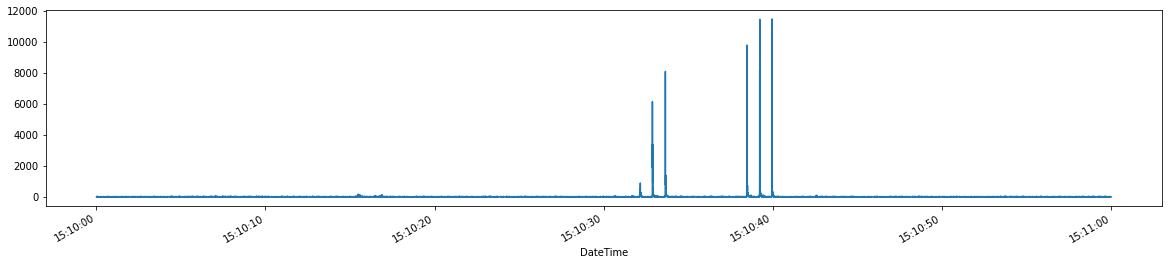

In [172]:
# test cutting interval 
# dress
# ta = pd.to_datetime('2023-02-15 12:05:00.00+0100')
# tb = pd.to_datetime('2023-02-15 12:06:30.00+0100')
# C1
ta = pd.to_datetime('2023-02-18 16:10:00.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
tb = pd.to_datetime('2023-02-18 16:11:00.00+0100')

tic = time.time()

dataLoc = s_files.iloc[0,14]
matched = qex.matched_files(dataLoc,path,sep) # outputs locations of csv 
for fi in matched:
    fileName = fi.split(sep)[-1]
    if fileName.startswith('FASTACC'):
        print(fileName)
        V = qex.cut_by_time(fi,ta,tb)
        df = V.loc[:,[ 'Vert Accelerometer','Lat Accelerometer','Long Accelerometer']]
        sig_v = np.sqrt(np.square(df.diff()).sum(axis=1))
        sig_v.plot(figsize=[20,4])
        plt.show()
        #qex.test_plot_signals_interval(V,ta,tb)


In [174]:
tac = time.time()

for i,row in s_files.iterrows():
    tic = time.time()
    dataFile = row['FullLoc']
    matched = qex.matched_files(dataFile,path,sep)  # outputs locations of csv and sem files
    
    for fi in matched:
        fileName = fi.split(sep)[-1]
        if fileName.lower().endswith('csv'):
            if not fileName.lower().endswith('Recordings.csv'):
                fn = fileName.split('.')
                fn_new = fn[0]+'-synch.csv'
                out_f = projectPath + fn_new
                print(out_f)
                V = qex.cut_by_time(fi,t1,t2)
                V.to_csv(out_f) # write the trimmed csv to the external harddisk
    print([i, time.time()-tic, time.time()-tac])

dfiles = qex.qiosk_recordings(projectPath,projectName,sep)
print(projectPath)
print(projectName)
dfiles

/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/DATA-VN104-3420456-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/ECG-VN104-3420456-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/FASTACC-VN104-3420456-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RESPACC-VN104-3420456-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RR-VN104-3420456-23021800-cut-synch.csv
[0, 5.221835136413574, 5.222944974899292]
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/DATA-WW502-5022156-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/ECG-WW502-5022156-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/FASTACC-WW502-5022156-23021800-cut-synch.csv
/Users/finn/Desktop/Curre

/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/FASTACC-VA308-5022131-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RESPACC-VA308-5022131-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RR-VA308-5022131-23021800-cut-synch.csv
[13, 5.453006029129028, 72.72536587715149]
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/DATA-VN105-3420755-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/ECG-VN105-3420755-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/FASTACC-VN105-3420755-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RESPACC-VN105-3420755-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RR-VN105-3420755-23021800-cut-synch.csv
[14, 4.960913896560669

/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RESPACC-BR603-5022193-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RR-BR603-5022193-23021800-cut-synch.csv
[26, 4.7820210456848145, 137.47744512557983]
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/DATA-VN201-5022050-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/ECG-VN201-5022050-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/FASTACC-VN201-5022050-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RESPACC-VN201-5022050-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RR-VN201-5022050-23021800-cut-synch.csv
[27, 5.177493095397949, 142.65522503852844]
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/DATA-VA306-5022126-23

/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RR-LS402-5022139-23021800-cut-synch.csv
[39, 5.267729997634888, 204.25019788742065]
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/DATA-VN202-5022051-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/ECG-VN202-5022051-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/FASTACC-VN202-5022051-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RESPACC-VN202-5022051-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RR-VN202-5022051-23021800-cut-synch.csv
[40, 4.938785076141357, 209.18917870521545]
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/DATA-WW506-5022166-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/ECG-WW506-5022166-2302180

/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/FASTACC-LS404-5022142-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RESPACC-LS404-5022142-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RR-LS404-5022142-23021800-cut-synch.csv
[53, 4.765604019165039, 276.5399589538574]
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/DATA-PC704-5022244-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/ECG-PC704-5022244-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/FASTACC-PC704-5022244-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RESPACC-PC704-5022244-23021800-cut-synch.csv
/Users/finn/Desktop/Current_Projects/Stavanger/Data/Equivital/Synching/C5/RR-PC704-5022244-23021800-cut-synch.csv
[54, 4.866602897644043

,Signal,DevName,ID,Date,Session,FileName,FileType,FileSize,RecStart,RecEnd,...,SubjectNames,SENSOR ID,SUBJECT ID,SUBJECT AGE,HR(BPM),HRC(%),BELT OFF,LEAD OFF,MOTION,BODY POSITION
0,DATA,WW502,5022156,230218,0,DATA-WW502-5022156-23021800-cut-synch.csv,csv,1429,2023-02-18 15:08:31+00:00,2023-02-18 15:12:16+00:00,...,[WW502],5022156.0,WW502,NaN,70.0,98.0,0.0,0.0,Stationary,Upright
1,DATA,VN204,5022058,230218,0,DATA-VN204-5022058-23021800-cut-synch.csv,csv,1429,2023-02-18 15:08:31+00:00,2023-02-18 15:12:16+00:00,...,[VN204],5022058.0,VN204,NaN,75.0,98.0,0.0,0.0,Stationary,Upright
2,DATA,LS403,5022141,230218,0,DATA-LS403-5022141-23021800-cut-synch.csv,csv,1431,2023-02-18 15:08:31+00:00,2023-02-18 15:12:16+00:00,...,[LS403],5022141.0,LS403,NaN,85.0,98.0,0.0,0.0,Stationary,Upright
3,DATA,VN104,3420456,230218,0,DATA-VN104-3420456-23021800-cut-synch.csv,csv,1435,2023-02-18 15:08:31+00:00,2023-02-18 15:12:16+00:00,...,[VN104],3420456.0,VN104,NaN,78.0,98.0,0.0,0.0,Stationary,Upright
4,DATA,WW505,5022164,230218,0,DATA-WW505-5022164-23021800-cut-synch.csv,csv,1431,2023-02-18 15:08:32+00:00,2023-02-18 15:12:17+00:00,...,[WW505],5022164.0,WW505,NaN,88.0,98.0,0.0,0.0,Stationary,Upright
5,DATA,LS406,5023926,230218,0,DATA-LS406-5023926-23021800-cut-synch.csv,csv,1432,2023-02-18 15:08:32+00:00,2023-02-18 15:12:17+00:00,...,[LS406],5023926.0,LS406,NaN,76.0,98.0,0.0,0.0,Stationary,Upright
6,DATA,PC705,5022245,230218,0,DATA-PC705-5022245-23021800-cut-synch.csv,csv,1381,2023-02-18 15:08:32+00:00,2023-02-18 15:12:17+00:00,...,[PC705],5022245.0,PC705,NaN,37.0,70.0,0.0,0.0,Stationary,Side
7,DATA,VN209,5022077,230218,0,DATA-VN209-5022077-23021800-cut-synch.csv,csv,1430,2023-02-18 15:08:32+00:00,2023-02-18 15:12:17+00:00,...,[VN209],5022077.0,VN209,NaN,82.0,98.0,0.0,0.0,Stationary,Upright
8,DATA,LS405,5022143,230218,0,DATA-LS405-5022143-23021800-cut-synch.csv,csv,1431,2023-02-18 15:08:33+00:00,2023-02-18 15:12:18+00:00,...,[LS405],5022143.0,LS405,NaN,80.0,98.0,0.0,0.0,Stationary,Upright
9,DATA,VA303,5022104,230218,0,DATA-VA303-5022104-23021800-cut-synch.csv,csv,1397,2023-02-18 15:08:33+00:00,2023-02-18 15:12:18+00:00,...,[VA303],5022104.0,VA303,NaN,166.0,50.0,0.0,1.0,Stationary,Side


In [163]:
dfiles = qex.qiosk_recordings(projectPath,projectName,sep)
